In [142]:
import pandas as pd
from pyspark.sql.functions import col,split,concat,concat_ws,size
import re
import pyspark
import geopandas
import matplotlib.pyplot as plt
from pyspark.sql.types import FloatType


In [143]:
ds = sc.textFile("s3://mukiawsproject/lat_longs.txt")
rdd=ds.map(lambda x: (re.split('[\t ]',x))).cache()
rdd=rdd.map(lambda x:(x[0],x[1],x[2]))

In [144]:
dfx = sqlContext.createDataFrame(data=rdd)
dfx=dfx.select(concat('_1').alias("latitude"),concat('_2').alias("longitude"),concat('_3').alias("page"))

In [145]:
dfx.show(10)

+------------------+------------------+--------------------+
|          latitude|         longitude|                page|
+------------------+------------------+--------------------+
|              36.7| 3.216666666666667|<http://dbpedia.o...|
|              42.5|1.5166666666666666|<http://dbpedia.o...|
|12.516666666666667|-70.03333333333333|<http://dbpedia.o...|
|-8.833333333333334|13.333333333333334|<http://dbpedia.o...|
|41.333333333333336|              19.8|<http://dbpedia.o...|
| 34.53333333333333| 69.13333333333334|<http://dbpedia.o...|
|40.416666666666664|49.833333333333336|<http://dbpedia.o...|
| 39.93333333333333| 32.86666666666667|<http://dbpedia.o...|
| 52.36666666666667|               4.9|<http://dbpedia.o...|
|             50.46|              2.13|<http://dbpedia.o...|
+------------------+------------------+--------------------+
only showing top 10 rows



In [146]:
dfx=dfx.toPandas()

In [151]:
dfx['latitude'] = pd.to_numeric(dfx['latitude'],errors='coerce')
dfx['longitude'] = pd.to_numeric(dfx['longitude'],errors='coerce')


In [154]:
dfx.to_csv('s3://mukiawsproject/DBPedia.csv',header=None)

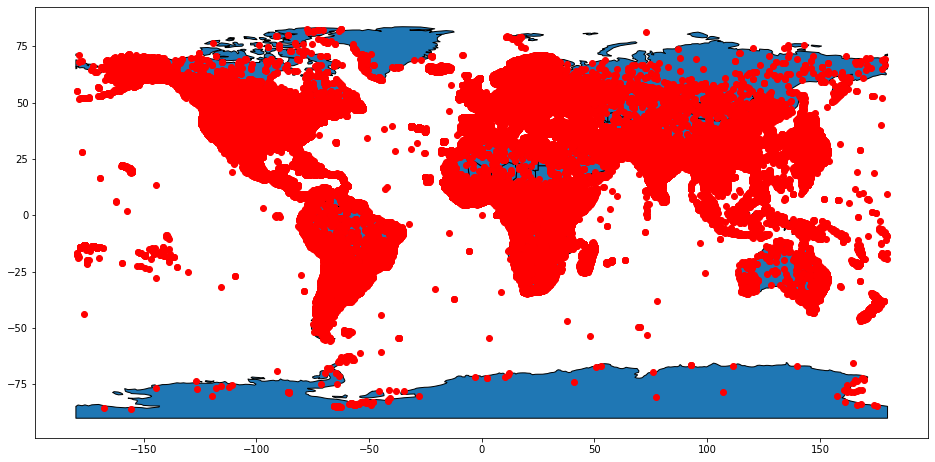

In [155]:
gdf = geopandas.GeoDataFrame(
    dfx, geometry=geopandas.points_from_xy(dfx.longitude, dfx.latitude))


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    edgecolor='black',figsize=(16,16))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

plt.show()